# <font color='red'>A Simple Nueral Network</font>
### This code is a simple example of how to use a neural network to classify Iris flowers. The code first imports the necessary libraries, including TensorFlow, NumPy, scikit-learn, and LabelEncoder.

In [7]:
# Import the necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [9]:
# Encode the target labels to binary classes: 0 for Iris-setosa, 1 for Iris-versicolor
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = np.where(y == 0, 0, 1)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train The model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
15/15 [==============================] - 1s 1ms/step - loss: 2.3467 - accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 2.1139 - accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 1.8908 - accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 865us/step - loss: 1.6958 - accuracy: 0.3167
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 1.5068 - accuracy: 0.2667
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 1.3357 - accuracy: 0.1250
Epoch 7/50
15/15 [==============================] - 0s 935us/step - loss: 1.1915 - accuracy: 0.0417
Epoch 8/50
15/15 [==============================] - 0s 508us/step - loss: 1.0726 - accuracy: 0.0083
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 0.9725 - accuracy: 0.0083
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 0.8968 - accuracy: 0.0583
Epoch 11/50
1

In [14]:
#Evaluate the model on the test set 
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: 0.1455, Test Accuracy: 1.0000


# <font color='red'>An example of Supervised Learning</font>
## This is an exmple of sentiment analysis using supervised learning 

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
# Load the IMDb dataset with the 10,000 most frequently occurring words
vocab_size = 10000
max_sequence_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [24]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Train the model
epochs = 10
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 206s 289ms/step - loss: 0.4292 - accuracy: 0.8035 - val_loss: 0.3673 - val_accuracy: 0.8452
Epoch 2/10
704/704 [==============================] - 232s 330ms/step - loss: 0.2623 - accuracy: 0.8973 - val_loss: 0.3126 - val_accuracy: 0.8676
Epoch 3/10
704/704 [==============================] - 230s 326ms/step - loss: 0.1864 - accuracy: 0.9308 - val_loss: 0.3634 - val_accuracy: 0.8700
Epoch 4/10
704/704 [==============================] - 212s 301ms/step - loss: 0.1409 - accuracy: 0.9470 - val_loss: 0.3902 - val_accuracy: 0.8540
Epoch 5/10
704/704 [==============================] - 206s 292ms/step - loss: 0.1091 - accuracy: 0.9617 - val_loss: 0.4687 - val_accuracy: 0.8388
Epoch 6/10
704/704 [==============================] - 204s 290ms/step - loss: 0.0947 - accuracy: 0.9671 - val_loss: 0.4478 - val_accuracy: 0.8516
Epoch 7/10
704/704 [==============================] - 223s 317ms/step - loss: 0.0869 - accuracy: 0.9695 - val_loss: 0.5784 -

In [36]:
# Function to predict sentiment of a new review
def predict_sentiment(review_text):
    # Tokenize and preprocess the new review
    word_to_index = imdb.get_word_index()
    review_tokens = [word_to_index.get(word, 0) for word in review_text.lower().split()]
    review_tokens = pad_sequences([review_tokens], maxlen=max_sequence_length)

    # Predict sentiment
    prediction = model.predict(review_tokens)[0][0]
    if prediction >= 0:
        return "Positive"
    else:
        return "Negative"

In [37]:
# Test the model with a new review
new_review = "The movie was absolutely fantastic! I loved every bit of it."
sentiment = predict_sentiment(new_review)
print(f"Review: {new_review}")
print(f"Predicted Sentiment: {sentiment}")

1/1 [==============================] - 0s 33ms/step
Review: The movie was absolutely fantastic! I loved every bit of it.
Predicted Sentiment: Positive


#  <font color='red'>An example of Unsupervised Learning</font>
## Dimensionality reduction of the digits dataset using principal component analysis (PCA)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [19]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [20]:
# Apply PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

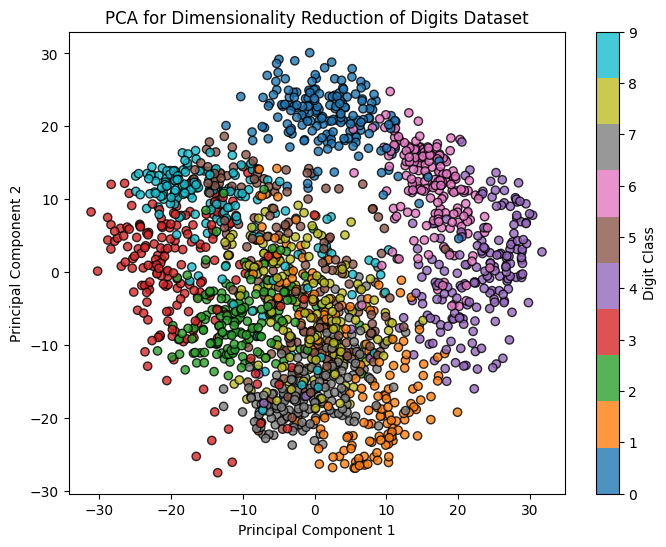

In [21]:
# Visualize the data in the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', edgecolors='k', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Dimensionality Reduction of Digits Dataset')
plt.colorbar(label='Digit Class')
plt.show()

# <font color='red'>An example of Reinforcement Learning</font>
## A simple implementation of a slot machine game using Python where the user can experience the randomness of rewards from different slot machines with varying distributions

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class SlotMachine(object):
    def __init__(self, mean=0, stdev=1):
        self.mean = mean
        self.stdev = stdev

    def pull_lever(self):
        reward = np.random.normal(self.mean, self.stdev)
        return np.round(reward, 1)

In [31]:
class SlotMachineGame(object):
    def __init__(self, slot_machines):
        self.slot_machines = slot_machines
        np.random.shuffle(self.slot_machines)
        self.reset_game()

    def play(self, choice):
        reward = self.slot_machines[choice - 1].pull_lever()
        self.rewards.append(reward)
        self.total_reward += reward
        self.n_played += 1
        return reward

    def user_play(self):
        self.reset_game()
        print("Slot Machine Game started. " +
              "Enter 0 as input to end the game.")
        while True:
            print(f"\n -- Round {self.n_played}")
            choice = int(input(f"Select a machine " +
                     f"from 1 to {len(self.slot_machines)}: "))
            if choice in range(1, len(self.slot_machines) + 1):
                reward = self.play(choice)
                print(f"Machine {choice} gave " +
                      f"a reward of {reward}.")
                avg_rew = self.total_reward/self.n_played
                print(f"Your average reward " +
                      f"so far is {avg_rew}.")
            else:
                break
        print("Slot Machine Game has ended.")

        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" +
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")

            # Custom plot of rewards
            colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink']
            plt.figure(figsize=(10, 6))
            for i, reward in enumerate(self.rewards):
                x_pos = i + 1
                plt.barh(x_pos, reward, color=colors[i % len(colors)], edgecolor='black')
                plt.text(reward + 0.1, x_pos, str(reward), va='center', fontsize=10)
            plt.xlabel('Reward')
            plt.ylabel('Round of Play')
            plt.title('Distribution of Rewards in Slot Machine Game')
            plt.yticks(np.arange(1, len(self.rewards) + 1), np.arange(1, len(self.rewards) + 1))
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

    def reset_game(self):
        self.rewards = []
        self.total_reward = 0
        self.n_played = 0

In [32]:
# Create slot machines with different mean and stdev
machineA = SlotMachine(8, 2)
machineB = SlotMachine(4, 3)
machineC = SlotMachine(6, 4)

In [33]:
# Initialize the game with the slot machines
game = SlotMachineGame([machineA, machineB, machineC])

Slot Machine Game started. Enter 0 as input to end the game.

 -- Round 0
Select a machine from 1 to 3: 3
Machine 3 gave a reward of 10.1.
Your average reward so far is 10.1.

 -- Round 1
Select a machine from 1 to 3: 2
Machine 2 gave a reward of 1.5.
Your average reward so far is 5.8.

 -- Round 2
Select a machine from 1 to 3: 1
Machine 1 gave a reward of 2.6.
Your average reward so far is 4.733333333333333.

 -- Round 3
Select a machine from 1 to 3: 5
Slot Machine Game has ended.
Total reward is 14.2 after 3 round(s).
Average reward is 4.733333333333333.


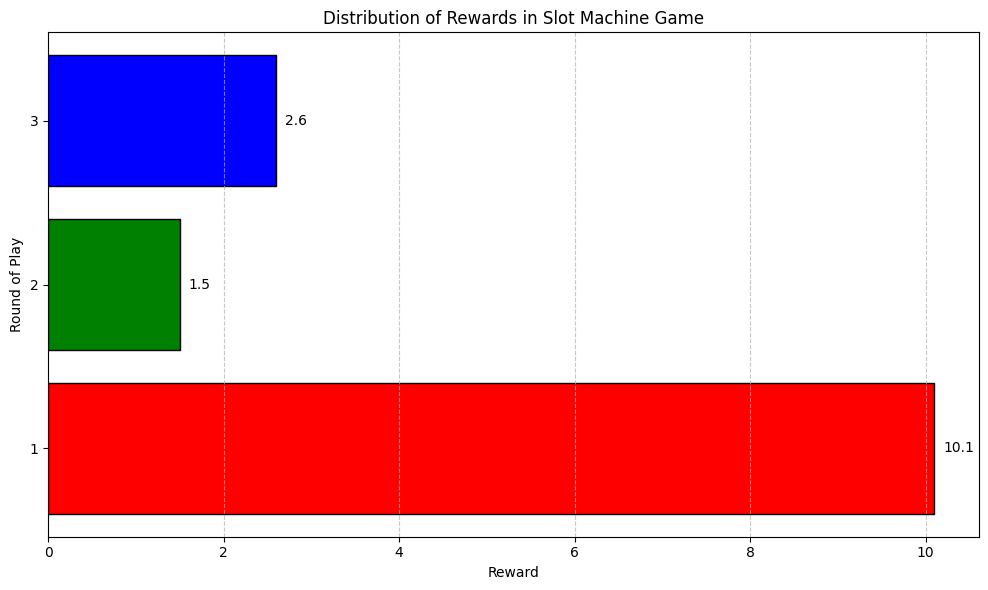

In [38]:
# Play the game
game.user_play()